In [1]:
import os 
from os.path import isdir, join
from scipy.io import wavfile
from pydub import AudioSegment
import librosa
import IPython
import numpy as np
import random as rand
import python_speech_features
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_random_time_segment(segment_ms):
    """
    Gets a random time segment of duration segment_ms in a 60,000 ms audio clip.
    
    Arguments:
    segment_ms -- the duration of the audio clip in ms ("ms" stands for "milliseconds")
    
    Returns:
    segment_time -- a tuple of (segment_start, segment_end) in ms
    """
    
    segment_start = np.random.randint(low=0, high=10000-segment_ms)   # Make sure segment doesn't run past the 10sec background 
    segment_end = segment_start + segment_ms -1
    
    return (segment_start, segment_end)

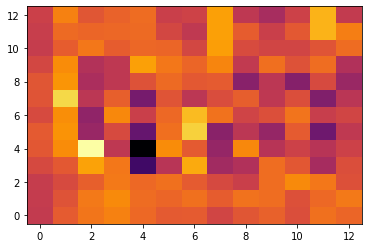

In [3]:
background = AudioSegment.from_wav('audio/Recording (70) (online-audio-converter.com).wav')
audio_clip = AudioSegment.from_wav('audio/test_rillakuma.wav')
segment_start, segment_end = get_random_time_segment(2000)

temp_file_name = 'insert_clip.wav'
new_clip = background.overlay(audio_clip,position=segment_start)
new_clip[segment_start:segment_end].export(temp_file_name, format="wav")
IPython.display.Audio(temp_file_name)


signal, rate = librosa.load(temp_file_name, sr=8000)
mfcc = python_speech_features.base.mfcc(signal, samplerate=rate, winstep=0.15, winlen=.2, nfft=2048, winfunc=np.hamming)
dim_1, dim_2 = mfcc.shape
fig = plt.figure()
plt.imshow(mfcc, cmap='inferno', origin='lower', aspect='auto')
reshape_dim = dim_1 * dim_2

In [4]:
background_files = []
for i in range(int(len(background) / 10000)):
    t = i * 10000
    newAudio = background[t:t+10000]
    newAudio.export(f'audio/background/background_{i}.wav', format="wav")
    background_files.append(f'audio/background/background_{i}.wav')

In [5]:
def create_sample(background, audio_clip):
    segment_start, segment_end = get_random_time_segment(2000)

    temp_file_name = 'insert_clip.wav'
    new_clip = background.overlay(audio_clip,position=segment_start)
    new_clip[segment_start:segment_end].export(temp_file_name, format="wav")

    signal, rate = librosa.load(temp_file_name, sr=8000)
    mfcc = python_speech_features.base.mfcc(signal, samplerate=rate, winstep=0.15, winlen=.2, nfft=2048, winfunc=np.hamming)

    return mfcc

In [ ]:
print('signal shapesignal.shape

(16000,)

In [6]:
google_speech_path = 'audio/google_speech'
pos_sample_path = 'audio/train'

positive_samples = []
for file in os.listdir(pos_sample_path):
    audio_clip = AudioSegment.from_wav(join(pos_sample_path,file))
    background = AudioSegment.from_wav(rand.choice(background_files))
    positive_samples.append(create_sample(background,audio_clip))

In [7]:
np.array(positive_samples).shape

(157, 13, 13)

In [8]:
negative_file_names = []
for name in os.listdir(google_speech_path):
    if isdir(join(google_speech_path, name)):
        negative_file_names.append(name)
        
negative_file_names = negative_file_names[:-1]

negative_samples = []
for name in negative_file_names:
    filepath = join(google_speech_path, name)
    for file in os.listdir(filepath)[:5]:
        audio_clip = AudioSegment.from_wav(join(filepath,file))
        background = AudioSegment.from_wav(rand.choice(background_files))
        negative_samples.append(create_sample(background,audio_clip))

In [9]:
np.array(negative_samples).shape

(150, 13, 13)

In [10]:
X_train = []
y_train = []

for i in range(len(positive_samples)):
    X_train.append(positive_samples[i])
    y_train.append(1)

for i in range(len(negative_samples)):
    X_train.append(negative_samples[i])
    y_train.append(0)
    
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [11]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [12]:
np.array(y_train[:-1])

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [13]:
model = KNeighborsClassifier()
model.fit(np.array(X_train[:-1]).reshape(-1,reshape_dim),np.array(y_train[:-1]).reshape(-1,1))

C:\Users\thebe\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
# from sklearn import datasets
# data = datasets.load_digits()
# data.data.shape
# np.array(X_train[:-1]).reshape(-1,325).shape
print(model.predict(np.array(X_train[-1]).reshape(-1,reshape_dim)))
print(y_train[-1])

test_positive = AudioSegment.from_wav('audio/test_rillakuma.wav')
test_negative = AudioSegment.from_wav('audio/google_speech/dog/402e2977_nohash_0.wav')
test_negative_1 = AudioSegment.from_wav('audio/google_speech/marvin/3c8836dc_nohash_0.wav')
pos_test_sample = create_sample(background, test_positive)
neg_test_sample_1 = create_sample(background, test_negative)
neg_test_sample_2 = create_sample(background, test_negative_1)

[1]
1


In [15]:
print('prediction: ', model.predict(np.array(pos_test_sample).reshape(1,reshape_dim)), ' label is : 1' )
print('prediction: ', model.predict(np.array(neg_test_sample_1).reshape(1,reshape_dim)), ' label is : 0' )
print('prediction: ', model.predict(np.array(neg_test_sample_2).reshape(1,reshape_dim)), ' label is : 0' )

prediction:  [1]  label is : 1
prediction:  [0]  label is : 0
prediction:  [0]  label is : 0


In [16]:
model.score(np.array(X_train).reshape(-1,reshape_dim),np.array(y_train).reshape(-1,1))

0.990228013029316

In [17]:
model.predict(np.array(X_train).reshape(-1,reshape_dim))

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [18]:
path = 'audio/test'

positive = []
for file in os.listdir(path):
    audio_clip = AudioSegment.from_wav(join(path,file))
    background = AudioSegment.from_wav(rand.choice(background_files))
    positive.append(create_sample(background,audio_clip))

In [19]:
negative = []
for name in negative_file_names:
    filepath = join(google_speech_path, name)
    for file in os.listdir(filepath)[10:12]:
        audio_clip = AudioSegment.from_wav(join(filepath,file))
        background = AudioSegment.from_wav(rand.choice(background_files))
        negative.append(create_sample(background,audio_clip))

In [20]:
print(sum(model.predict(np.array(positive).reshape(-1,reshape_dim)))/len(positive))
print(sum(model.predict(np.array(negative).reshape(-1,reshape_dim)))/len(negative))

0.967741935483871
0.1


In [21]:
print(model.predict(np.array(positive).reshape(-1,reshape_dim)))
print(model.predict(np.array(negative).reshape(-1,reshape_dim)))

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [22]:
# X_train_neg = rand.choices(negative_sample_files, k=100)

In [23]:
synth_predictions = model.predict(np.array(positive).reshape(-1,reshape_dim))

In [24]:
false_preds = [i for i, x in enumerate(synth_predictions) if not x]

In [25]:
bad_files = []
for i in false_preds:
    bad_files.append(join(path,os.listdir(path)[i]))

In [26]:
bad_files

['audio/test\\Recording (70).wav']

In [27]:
def preprocess_audio(filename):
    # Trim or pad audio segment to 2000ms
    padding = AudioSegment.silent(duration=2000)
    segment = AudioSegment.from_wav(filename)[:2000]
    segment = padding.overlay(segment)
    # Set frame rate to 44100
    segment = segment.set_frame_rate(44100)
    # Export as wav
    return segment

In [28]:
path = 'audio/test'

positive = []
for file in os.listdir(path):
    temp_file_name = 'insert_clip.wav'
    new_clip = preprocess_audio(join(path,file))
    new_clip.export(temp_file_name, format="wav")
    signal, rate = librosa.load(temp_file_name, sr=8000)
    mfcc = python_speech_features.base.mfcc(signal, samplerate=rate, winstep=0.15, winlen=.2, nfft=2048, winfunc=np.hamming)
    positive.append(mfcc)

In [29]:
model.predict(np.array(positive).reshape(-1,reshape_dim))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
import pickle

In [31]:
filename = 'initial_model.sav'
pickle.dump(model, open(filename, 'wb'))